In [ ]:
# Import the necessary libraries for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

In [ ]:
# Read the txt file
columns = ['Time','BVP','Abdominal Respiration','Skin Conductance']
df1 = pd.read_csv('ALMA RUBI ACOSTA HERNANDEZ PRETEST.txt', sep=',', header = None, names = columns);
df1

,Time,BVP,Abdominal Respiration,Skin Conductance
0,0.003906,0.004,30.089,2.797
1,0.007812,0.063,30.089,2.797
2,0.011719,0.290,30.089,2.798
3,0.015625,0.814,30.089,2.798
4,0.019531,1.747,30.089,2.798
...,...,...,...,...
276475,1079.984375,35.457,31.939,4.367
276476,1079.988281,35.723,31.936,4.367
276477,1079.992188,36.001,31.933,4.368
276478,1079.996094,36.287,31.930,4.368


In [ ]:
# Reduce from 256 samples per second to 1 sample per second with median
time=0;
j=127;
k=128;
Time_list = []
BVP_list =[];
B_list = [];
SC_list = [];
T_list = [];
for i in range(0,1080):
    Time_list.append(time)
    BVP_median=(df1['BVP'].iloc[j]+df1['BVP'].iloc[k])/2
    BVP_list.append(BVP_median)
    B_median=(df1['Abdominal Respiration'].iloc[j]+df1['Abdominal Respiration'].iloc[k])/2
    B_list.append(B_median)
    SC_median=(df1['Skin Conductance'].iloc[j]+df1['Skin Conductance'].iloc[k])/2
    SC_list.append(SC_median)
    j=j+256
    k=k+256
    time=time+1

data = pd.DataFrame(list(zip(Time_list, BVP_list, B_list, SC_list)), columns =['Time','BVP','Abdominal Respiration','Skin Conductance'])
data

,Time,BVP,Abdominal Respiration,Skin Conductance
0,0,38.2240,29.7780,2.8090
1,1,39.1885,30.5790,2.8105
2,2,36.0670,30.6215,2.8110
3,3,37.4500,29.9090,2.8260
4,4,38.9285,29.6940,2.8515
...,...,...,...,...
1075,1075,33.7200,32.0730,4.4030
1076,1076,36.2735,31.4120,4.3960
1077,1077,35.7160,31.9565,4.3830
1078,1078,35.7110,32.6555,4.3750


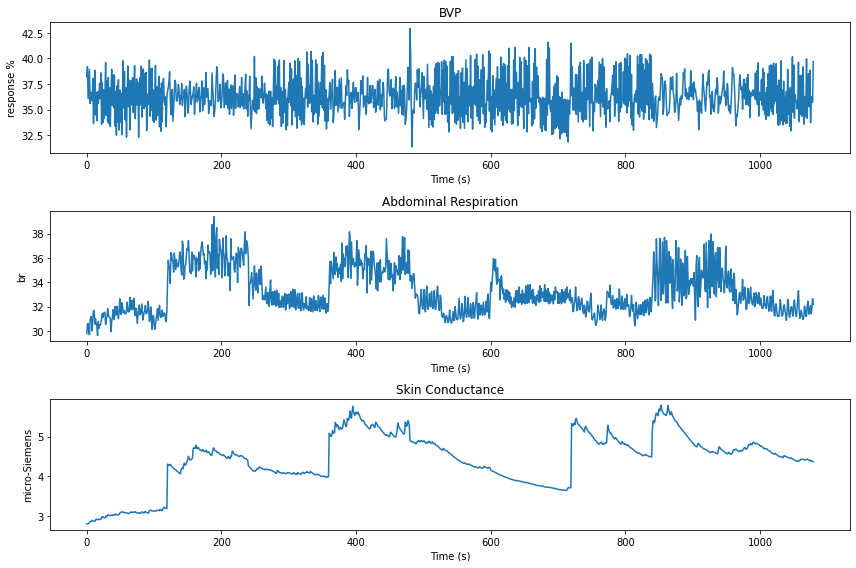

In [ ]:
# Plot figures
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True
x = data['Time']
y1 = data['BVP']
y2 = data['Abdominal Respiration']
y3 = data['Skin Conductance']
plt.subplot(311)
plt.title('BVP')
plt.xlabel('Time (s)')
plt.ylabel('response %')
plt.plot(y1)
plt.subplot(312)
plt.title('Abdominal Respiration')
plt.xlabel('Time (s)')
plt.ylabel('br')
plt.plot(y2)
plt.subplot(313)
plt.title('Skin Conductance')
plt.xlabel('Time (s)')
plt.ylabel('micro-Siemens')
plt.plot(y3)
plt.show()

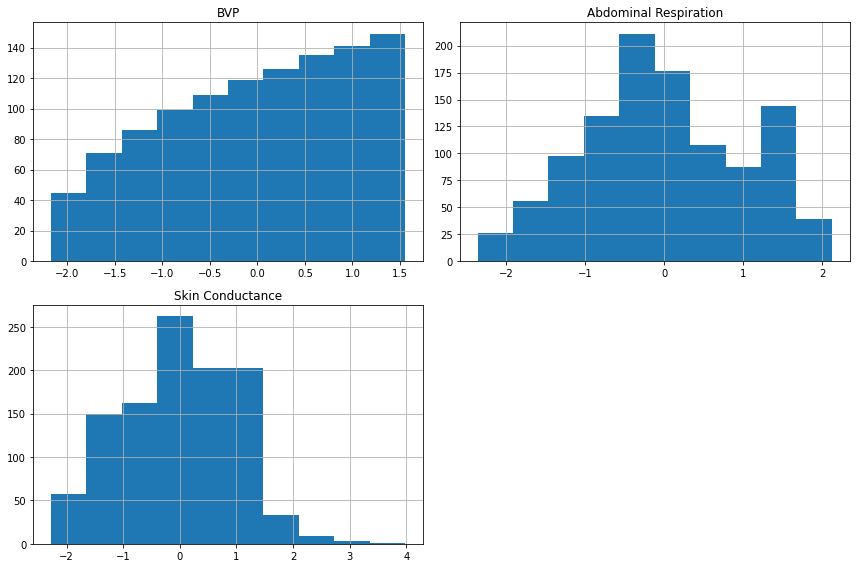

In [ ]:
# Apply power transformer with the Yeo-Johnson method of the ScikitLearn module
data.drop(['Time'], axis=1)

# retrieve just the numeric input values
data = data.values[:, :-1]
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
dataset.columns =['BVP','Abdominal Respiration','Skin Conductance']
# histograms of the variables
dataset.hist()
pyplot.show()

In [ ]:
# Add phase column
Phase_list=[];
for i in range (0,120):
  Phase_list.append('Stage 1')
for i in range (120,240):
  Phase_list.append('Stage 2')
for i in range (240,360):
  Phase_list.append('Stage 3')
for i in range (360,480):
  Phase_list.append('Stage 4')
for i in range (480,600):
  Phase_list.append('Stage 5')
for i in range (600,720):
  Phase_list.append('Stage 6')
for i in range (720,840):
  Phase_list.append('Stage 7')
for i in range (840,960):
  Phase_list.append('Stage 8')
for i in range (960,1080):
  Phase_list.append('Stage 9')

dataset['Phase'] = Phase_list
dataset

,BVP,Abdominal Respiration,Skin Conductance,Phase
0,-2.169119,-0.275271,-1.350194,Stage 1
1,-2.152321,0.026918,-1.729244,Stage 1
2,-2.137909,1.570446,-2.040524,Stage 1
3,-2.124856,-0.835431,-1.857937,Stage 1
4,-2.112729,1.386936,-1.666184,Stage 1
...,...,...,...,...
1075,1.544423,-1.488481,-0.126939,Stage 9
1076,1.546888,1.646171,-0.120529,Stage 9
1077,1.549353,-0.308112,-0.097086,Stage 9
1078,1.551816,-1.781302,-0.030628,Stage 9


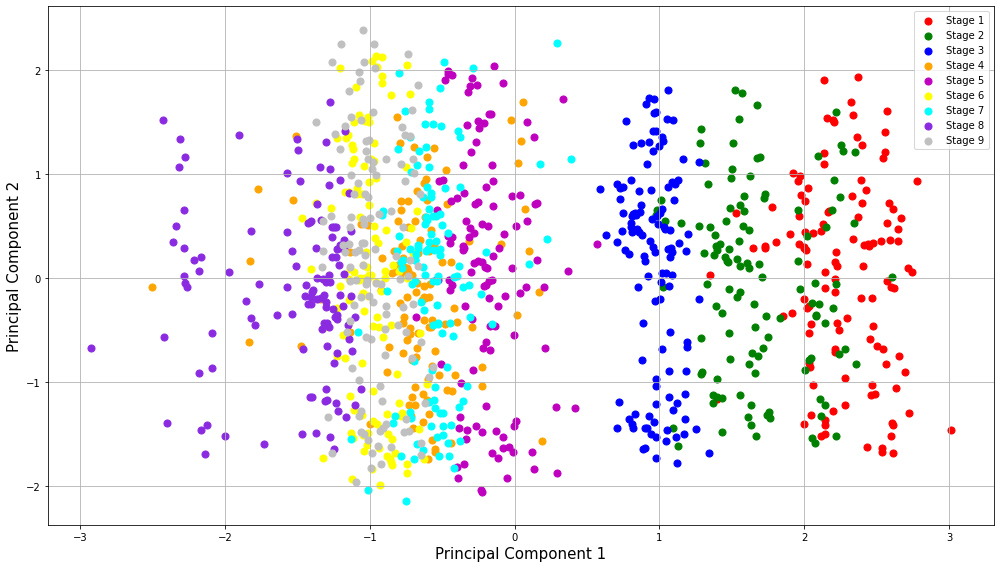

In [ ]:
# Applying PCA with top 2 principal components

features = ['BVP','Abdominal Respiration','Skin Conductance']
# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['Phase']].values

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])

finalDf = pd.concat([principalDf, dataset[['Phase']]], axis = 1)

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
targets = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5', 'Stage 6', 'Stage 7', 'Stage 8', 'Stage 9']
colors = ['r', 'g', 'b', 'orange', 'm', 'yellow', 'cyan', 'blueviolet', 'silver']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Phase'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1'], finalDf.loc[indicesToKeep, 'PC 2'], c = color, s=50)
ax.legend(targets)
ax.grid()

In [ ]:
# Get centroids coordinates
kmeans = KMeans(n_clusters=9).fit(principalDf)
centers = pca.inverse_transform(kmeans.cluster_centers_)
print(centers)

[[ 0.28290426 -0.2848709  -0.31491981]
 [-0.90834906  1.24231506  1.05230182]
 [-0.647978   -1.29588461  0.47656797]
 [ 0.85970239 -1.44766308 -1.03009743]
 [ 1.15547604  1.39102446 -0.96535601]
 [-0.4636969  -0.00643318  0.45671297]
 [ 1.1537025  -0.12873492 -1.15450746]
 [-1.21517004 -0.17403649  1.17712433]
 [ 0.13488815  1.25325307  0.02433312]]


In [ ]:
# Find Euclidean Distances between phases
Phase1_c = centers[0]
Phase2_c = centers[1]
Phase3_c = centers[2]
Phase4_c = centers[3]
Phase5_c = centers[4]
Phase6_c = centers[5]
Phase7_c = centers[6]
Phase8_c = centers[7]
Phase9_c = centers[8]

dist1_2 = np.linalg.norm(Phase1_c-Phase2_c)
dist1_3 = np.linalg.norm(Phase1_c-Phase3_c)
dist1_4 = np.linalg.norm(Phase1_c-Phase4_c)
dist1_5 = np.linalg.norm(Phase1_c-Phase5_c)
dist1_6 = np.linalg.norm(Phase1_c-Phase6_c)
dist1_7 = np.linalg.norm(Phase1_c-Phase7_c)
dist1_8 = np.linalg.norm(Phase1_c-Phase8_c)
dist1_9 = np.linalg.norm(Phase1_c-Phase9_c)
dist8_9 = np.linalg.norm(Phase8_c-Phase9_c)

print("Phase 1 - Phase 2: ", dist1_2)
print("Phase 1 - Phase 3: ", dist1_3)
print("Phase 1 - Phase 4: ", dist1_4)
print("Phase 1 - Phase 5: ", dist1_5)
print("Phase 1 - Phase 6: ", dist1_6)
print("Phase 1 - Phase 7: ", dist1_7)
print("Phase 1 - Phase 8: ", dist1_8)
print("Phase 1 - Phase 9: ", dist1_9)
print("Phase 8 - Phase 9: ", dist8_9)

Phase 1 - Phase 2:  2.3707965835361247
Phase 1 - Phase 3:  1.585920365016462
Phase 1 - Phase 4:  1.4819786651496591
Phase 1 - Phase 5:  1.9982677626796874
Phase 1 - Phase 6:  1.109215040662447
Phase 1 - Phase 7:  1.2196620172718595
Phase 1 - Phase 8:  2.1172403247413496
Phase 1 - Phase 9:  1.5820324462668804
Phase 8 - Phase 9:  2.2778806329385177
